#  The Spark Foundation
## TASK 1
### Predicting the scores of a student based upon number of hours studied. Using simple Linear Regression

#### Author: Abhishek Dubey                                                                                               
##### linkedin: www.linkedin.com/in/abhishek-dubey96

## Importing the necessary libraries

In [148]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [149]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


### Seeing the dataset

In [150]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [151]:
data.shape

(25, 2)

In [152]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Checking if there are any outliers

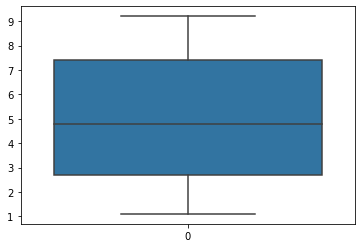

In [154]:
sns.boxplot(data=data['Hours'])

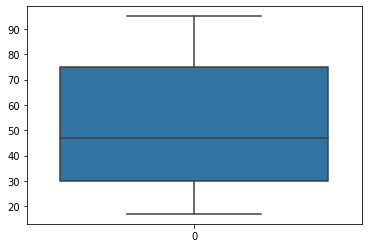

In [155]:
sns.boxplot(data=data['Scores'])

### Checking if data is linearly regressed or not

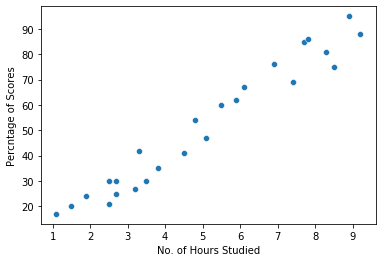

In [156]:
sns.scatterplot(x='Hours', y='Scores',data=data)
plt.xlabel("No. of Hours Studied")
plt.ylabel("Percntage of Scores")
plt.show()

### Checking out the correlation between the variables

In [157]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Regression starts
### Regression plot

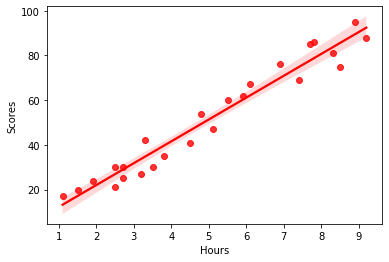

In [158]:
sns.regplot(x='Hours',y='Scores',color='Red',data=data)
## the shading near the line represents the scatter of the data

### Preparing the data

#### Splitting the data into X and Y variable

In [159]:
## Independent Variable i.e. Hours
X = data.iloc[:, :-1].values  
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [160]:
## Dependent Variable i.e. Scores

Y = data.iloc[:, 1].values  

print(Y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## Dividing the data into train and test split

In [161]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                            test_size=0.3, random_state=0) 

In [162]:
## Training the model

In [163]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print("Training Complete")

Training Complete


### Vizualizing the training data


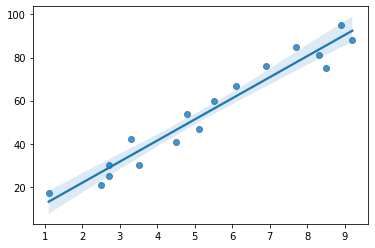

In [164]:
sns.regplot(X_train,y_train)

### Checking the plot of test data along with coeffcient and intercept

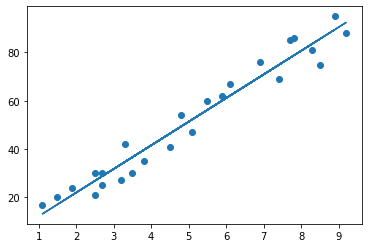

In [165]:
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

In [166]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


### Predicting the scores

In [167]:
y_pred=model.predict(X_test)
print(y_pred) 

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [168]:
y_test

array([20, 27, 69, 30, 62, 35, 24, 86], dtype=int64)

### Predicted Vs Actuals

In [169]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


## Model Validation

### 1. Residual Plot

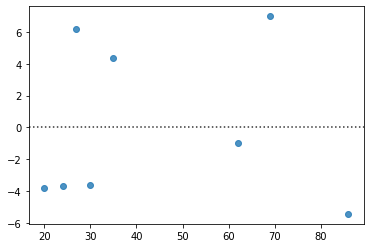

In [170]:
sns.residplot(y_test,y_pred)

### We can see that there is no distinguished pattern that is being shown in the plot. Which suggests that our model is performing well 

### 2. R Square 

In [171]:
from sklearn import metrics
r_square = metrics.r2_score(y_test,y_pred)
print(r_square)

0.9568211104435257


### The more the R squared value the better would be the model.

### 3. Mean Absolute error

In [172]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.419727808027652


### The lesser would be the mean absolute error value better would be the model. 

## Testing the model with putting our own values

In [173]:
hours = 9.25
own_pred = model.predict(np.array([9.25]).reshape(1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


### Thus the Predicted Score is 92.91% 


## Thank You